In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import math, random

%matplotlib inline

In [219]:
def cumulative(n):
    s = 0
    n = sorted(n)
    cx, cy = [], []
    last_n = None
    for ni in n:
        s += 1
        if ni != last_n:
            last_n = ni
            cx.append(ni)
            cy.append(s)
        else:
            cy[-1] = s
    x = np.array(cx)
    y = np.array(cy, dtype=np.float32)/s
    return x, y

def plot_cumulative(x):
    cx, cy = cumulative(x)

    ticks_major = np.arange(0.0, 1.1, 0.1)
    ticks_minor = np.arange(0.0, 1.1, 0.05)

    xticks = np.arange(0.0, 200.0, 10)

    fig = plt.figure()                                                               
    ax = fig.add_subplot(1,1,1)                                                      

    ax.plot(cx, cy)
    ax.set_xticks(xticks)                                                       
    ax.set_yticks(ticks_major)                                                       
    ax.set_yticks(ticks_minor, minor=True)                                                       
    ax.grid(True, which="both")
    plt.xscale("log")
    plt.show()

In [220]:
MaxQuestionLength = 100   # words

def normalize_question(q):
    q = q.lower()
    q = q.replace("?"," ? ")
    q = q.replace("..."," . ")
    q = q.replace(".."," . ")
    q = q.replace("."," . ")
    q = q.replace(":"," : ")
    q = q.replace(","," , ")
    q = q.replace("/"," / ")
    q = q.replace("("," ( ")
    q = q.replace(")"," ) ")
    q = q.replace("n't"," not ")    
    q = q.replace("i'm", "i am")
    q = q.replace("[math]", " [math] ")
    q = q.replace("[/math]", " [/math] ")
    q = q.replace("-"," - ")
    q = q.replace('"',' " ')
    q = q.replace('\xe2\x80\x9c', ' " ').replace('\xe2\x80\x9d', ' " ')    
    q = q.replace("'s", " 's ")
    words = q.lower().split()[:MaxQuestionLength]
    #words = map(lambda x: x.strip(), words)
    #words = filter(lambda x: len(x) > 0, words)
    words = map(lambda w: w[:-1] + " s" if len(w)>3 and w[-1]=='s' and 
                not w in ("this", "does") else w, words)
    return " ".join(words)

def word_frequencies(questions):
    words = " ".join(questions).split(" ")
    counter = Counter(words)
    return sorted(counter.items(), key=lambda x:-x[1])




In [221]:
train_df=pd.read_csv("/Users/igorvm/Projects/Neural/questions/data/train.csv")
train_df.fillna("", inplace=True)
print "Train set loaded:", len(train_df)

test_df = pd.read_csv("/Users/igorvm/Projects/Neural/questions/data/test.csv")
test_df.fillna("", inplace=True)
print "Test set loaded:", len(test_df)

test_questions = map(normalize_question, test_df["question1"].tolist() + test_df["question2"].tolist())
train_questions = map(normalize_question, train_df["question1"].tolist() + train_df["question2"].tolist())

print "questions normalized"



Train set loaded: 404290
Test set loaded: 2345796
questions normalized


In [222]:
test_questions = set(test_questions)
train_questions = set(train_questions)
all_questions = test_questions | train_questions


In [223]:
for i, q in enumerate(test_questions):
    print i, q
    if i > 100: break

0 
1 why do not maestro card s have practitioner cvv number ?
2 what’ s the difference con s of living in seattle , wa ?
3 approximately how much would the developer s of javascript have make by now if javascript was a proprietary product , considering it 's monopoly ?
4 why was cyru s reddit sacked ?
5 should i upgrade my iphone 5s to an iphone 7 , and if so , should python go iphone 7 or iphone 7plu s ?
6 if good are a scientist who believe s in god , why do you believe in god ?
7 what are grow best in the uk ?
8 who is the highest paid person ?
9 how hard strength s is it to be accepted into cambridge astrophysic s ?
10 is it a bad sign that i am not on speaking term s with any of my exe s ?
11 what are step s to year s in valuing / selling gold coin s ?
12 how institute mark s should i get in neet to get a seat ?
13 what are those high end why partie s called that rich people go to ?
14 my boyfriend started ignoring me for no reason . should i do ?
15 how and / or china toy s make 

In [224]:
all_frequencies = word_frequencies(all_questions)
train_frequencies = word_frequencies(train_questions)


In [225]:
print "Total number of questions:", len(all_questions)
print "Different words in train questions:", len(train_frequencies)
print "Different words in all questions:", len(all_frequencies)

Total number of questions: 4785887
Different words in train questions: 87684
Different words in all questions: 127685


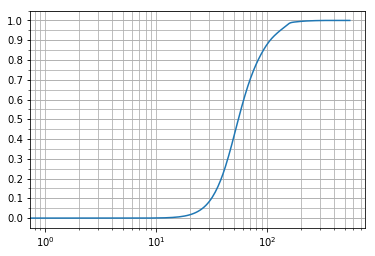

In [226]:
qlengths = map(len, all_questions)
plot_cumulative(qlengths)

In [227]:
print "100 most frequent words:", [w for w, n in all_frequencies[:100]]


100 most frequent words: ['?', 's', 'the', 'what', 'is', 'i', 'a', 'how', 'in', 'to', 'of', 'do', 'are', 'and', 'for', 'can', ',', '.', 'why', 'you', 'it', 'my', 'best', 'does', 'on', '"', 'or', 'which', 'if', 'not', 'get', '-', 'with', "'s", 'be', 'have', 'should', 'that', 'an', 'from', 'some', ')', '(', 'india', 'your', 'like', 'when', 'at', 'good', 'who', 'will', '/', 'people', 'there', 'way', 'as', 'would', 'am', 'one', 'make', 'between', 'where', 'about', 'me', 'time', ':', 'most', 'any', 'did', 'difference', 'we', 'by', 'was', 'after', 'so', 'year', 'life', 'use', 'quora', 'this', 'they', 'much', 'has', 'know', 'learn', 'other', 'their', 'work', 'someone', 'money', 'indian', 'many', 'day', 'better', 'book', 'want', 'thing', 'than', 'job', 'more']


In [228]:
words = [w for w, n in all_frequencies]
print "Number of different words:", len(words)
VocabularySize = len(words)

Number of different words: 127685


In [229]:
word_encoding = {w:i+1 for i, w in enumerate(words)}
word_decoding = [None] + words

In [230]:
encoding_df = pd.DataFrame(range(1, 1+VocabularySize), index=words, columns=["encoding"])
encoding_df.head()

,encoding
?,1
s,2
the,3
what,4
is,5


In [231]:
decoding_df = pd.DataFrame(words, index = range(1, 1+VocabularySize), columns=["decoding"])
decoding_df.head()

,decoding
1,?
2,s
3,the
4,what
5,is


In [232]:
def encode_question(q):
    # question is already normalized
    words = q.split()
    try: encoded = np.array([word_encoding[w] for w in words], dtype=np.uint32)
    except KeyError as error:
        print error
        print "question =", q
        raise
    return encoded

def permute_encoded_question(q):
    if len(q) <= 0: return q
    q = q.copy()
    n = len(q)
    m = max(1, n/3)
    r = range(n)
    for i in random.sample(r, m):
        q[i] = random.randint(1, VocabularySize)
    for _ in xrange(n/10):
        i,j = random.sample(r, 2)
        q[i], q[j] = q[j], q[i]
    return q


In [233]:
good_sentences = map(encode_question, all_questions)
for s in good_sentences[:100]:
    print " ".join(map(lambda x: word_decoding[x], s))


why do not maestro card s have practitioner cvv number ?
approximately how much would the developer s of javascript have make by now if javascript was a proprietary product , considering it 's monopoly ?
should i upgrade my iphone 5s to an iphone 7 , and if so , should python go iphone 7 or iphone 7plu s ?
how hard strength s is it to be accepted into cambridge astrophysic s ?
is it a bad sign that i am not on speaking term s with any of my exe s ?
what are step s to year s in valuing / selling gold coin s ?
my boyfriend started ignoring me for no reason . should i do ?
is there hotel proof ( eyewitnes s report s , video s or photograph s ) of a plane crashing into pentagon on 9 / 11 ?
is it cheaper to build my own desktop or buy a hostel s one ?
is there a way to samsung all the tweet s in a certain hashtag in a given period of time ?
what people i have to do to improve my writing skill s ?
why is english indian education system worthles s ?
can science subject the exsistence of sata

In [234]:
bad_sentences = map(permute_encoded_question, good_sentences)
for s in bad_sentences[:100]:
    print " ".join(map(lambda x: word_decoding[x], s))


predictwise middleby not maestro unsalted s have practitioner number cvv ?
approximately downwardly much would paine developer america' of javascript have make awadhe now if javascript was 65745512e proprietary yawn zenefit outkast it 's monopoly ?
should i upgrade my iphone lunchbox genecide an licence rochester , tack \frac{y}{x}\right so 5s should python ment cc=volume 7 or iphone , s ?
how hard myadvertisingpay s astrophysic it to standards' accepted guage cambridge icd s ?
is actuate a bad 2stroke s i speaking not on am term that with any of avigdor cornflour qualifiedand mosprime
what homeopath step carbonic to \dfrac{1}{n+1}+\dfrac{1}{n+2}+\dot s iiam valuing axena' selling in coin s ?
pci boyfriend started andher me balija idexation reason my should i do ?
is upsell hotel thanasi ( eyewitnes plane report s upin xseed s t150a safetly / ) of a s crashing into pentagon year…what 9 s handcuff sciter
one raytracing marzia to build 4140 own desktop or buy a saltaire s is jurvetson
y

In [235]:
sentences = [(s, 1) for s in good_sentences] + [(s, 0) for s in bad_sentences]
random.shuffle(sentences)
sentences_df = pd.DataFrame(sentences, columns=["sentence","is_good"])
sentences_df.head(100)

,sentence,is_good
0,"[4, 24, 3228, 63, 7111, 2, 26, 112, 26, 1]",1
1,"[8, 119803, 20, 162, 116571, 9, 26, 96606, 491...",0
2,"[12, 105554, 21698, 145, 3079, 852, 52, 6472, ...",0
3,"[9, 28, 1, 46403, 57356, 4768, 66915, 22460, 2...",0
4,"[6, 58, 2689, 1012, 18, 4, 1872, 738, 57, 20, ...",1
5,"[106, 293, 2, 64, 2488, 232, 97, 2, 63, 140, 4...",1
6,"[97640, 725, 12, 73934, 552, 1596, 53224, 3440...",0
7,"[19, 12, 8582, 2, 30, 765, 123, 23487, 2, 61, ...",1
8,"[4, 13, 41, 70, 2, 61, 1779, 14, 2522, 1]",1
9,"[12, 1424, 32, 15000, 2713, 2, 2188, 766, 499,...",1


In [236]:
store = pd.HDFStore("/Users/igorvm/Projects/Neural/questions/data/sentences_train.hd5")
store["encoding"] = encoding_df
store["decoding"] = decoding_df
store["sentences"] = sentences_df
store.close()



[128   2  99 ..., 116  98  46] 1822499
[128   2  99 ..., 116  98  46] 811724189
